In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import datetime as dt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import rcParams
sns.set_style("whitegrid", {'axes.grid' : True})

In [2]:
import os
print(os.getcwd())

C:\Users\dutyvts.MAPNOVO\Ipynb\metrika_cloud_case_data


In [3]:
hits_df = pd.read_csv('metrika_cloud_case_data_hits.csv', sep = '\t')
visits_df = pd.read_csv('metrika_cloud_case_data_visits.csv', sep = '\t')

In [4]:
hits_df.rename(columns={'ym:pv:browser':'Browser',
                'ym:pv:clientID':'ClientID',
                'ym:pv:date':'EventDate',
                'ym:pv:dateTime':'EventTime',
                'ym:pv:deviceCategory':'DeviceCategory',
                'ym:pv:lastTrafficSource':'TraficSource',
                'ym:pv:operatingSystemRoot':'OSRoot',
                'ym:pv:URL':'URL'}, inplace = True)

In [5]:
hits_df

,Browser,ClientID,EventDate,EventTime,DeviceCategory,TraficSource,OSRoot,URL
0,chrome,9625353358380463527,2020-07-06,2020-07-06 04:43:20,1,direct,macos,https://supermarket.ru/product_1280
1,chrome,9625353358380463527,2020-07-06,2020-07-06 04:43:34,1,direct,macos,https://supermarket.ru/product_1280
2,android_browser,15569343169762640095,2020-07-06,2020-07-06 13:26:04,2,referral,android,https://supermarket.ru/promo_action_2068
3,chrome,13994713805140870235,2020-07-06,2020-07-06 19:44:03,1,ad,macos,https://supermarket.ru/catalog_category_82
4,chrome,13994713805140870235,2020-07-06,2020-07-06 19:44:23,1,ad,macos,https://supermarket.ru/catalog_category_82
...,...,...,...,...,...,...,...,...
3037732,yandex_browser,10614237570022717803,2020-08-16,2020-08-16 18:58:43,2,direct,ios_double,https://supermarket.ru/promo_action_670
3037733,chrome,17484754865123058284,2020-08-16,2020-08-16 10:24:57,1,ad,windows,https://supermarket.ru/product_768
3037734,chrome,17484754865123058284,2020-08-16,2020-08-16 10:26:52,1,ad,windows,https://supermarket.ru/product_9446
3037735,chrome,17484754865123058284,2020-08-16,2020-08-16 14:34:13,1,ad,windows,https://supermarket.ru/product_7406


In [6]:
visits_df

,ym:s:browser,ym:s:clientID,ym:s:date,ym:s:dateTime,ym:s:deviceCategory,ym:s:lastTrafficSource,ym:s:operatingSystemRoot,ym:s:purchaseID,ym:s:purchaseRevenue,ym:s:startURL
0,chrome,12267275798148517398,2020-09-18,2020-09-18 10:40:59,1,internal,windows,['16891366513471468610'],[10767],https://supermarket.ru/search
1,safari_mobile,10275295047121029551,2020-09-03,2020-09-03 22:55:32,2,organic,ios_double,[],[],https://supermarket.ru/product_1798
2,chrome,16050187229564839418,2020-08-08,2020-08-08 03:46:34,1,direct,gnu_linux,[],[],https://supermarket.ru/product_678
3,chrome,4985086536106220175,2020-08-24,2020-08-24 21:21:35,1,ad,windows,[],[],https://supermarket.ru/
4,miui,6500393564893995094,2020-09-24,2020-09-24 07:00:20,2,direct,android,[],[],https://supermarket.ru/promo_action_2160
...,...,...,...,...,...,...,...,...,...,...
451588,chromemobile,18017800233728271508,2020-08-24,2020-08-24 20:57:49,2,organic,android,[],[],https://supermarket.ru/product_6400
451589,chromemobile,6123137263158380340,2020-09-01,2020-09-01 16:30:50,3,ad,android,[],[],https://supermarket.ru/product_4864
451590,yandex_browser,5289042743231680856,2020-09-01,2020-09-01 08:36:59,2,organic,android,[],[],https://supermarket.ru/product_5120
451591,NaN,12221905869671020963,2020-08-21,2020-08-21 00:20:51,1,direct,gnu_linux,[],[],https://supermarket.ru/catalog_category_9566


In [7]:
visits_df.rename(columns={'ym:s:browser':'Browser',
                'ym:s:clientID':'ClientID',
                'ym:s:date':'StartDate',
                'ym:s:dateTime':'StartTime',
                'ym:s:deviceCategory':'DeviceCategory',
                'ym:s:lastTrafficSource':'TraficSource',
                'ym:s:operatingSystemRoot':'OSRoot',
                'ym:s:purchaseRevenue': 'Purchase.Revenue', 
                'ym:s:purchaseID': 'Purchase.ID',
                'ym:s:startURL':'StartURL'}, inplace = True)

#### Создадим два новых столбца, подсчитав количество покупок и их сумму.

In [8]:
visits_df['Purchases'] = visits_df['Purchase.Revenue'].map(lambda x: x.count(',') + 1 if x != '[]' else 0 )
visits_df['Revenue'] = visits_df['Purchase.Revenue'].map(lambda x: sum(map(int,x[1:-1] \
                                                                        .split(','))) if x != '[]' else 0)
visits_df.drop(columns=['Purchase.ID','Purchase.Revenue'], inplace=True)

In [9]:
visits_df

,Browser,ClientID,StartDate,StartTime,DeviceCategory,TraficSource,OSRoot,StartURL,Purchases,Revenue
0,chrome,12267275798148517398,2020-09-18,2020-09-18 10:40:59,1,internal,windows,https://supermarket.ru/search,1,10767
1,safari_mobile,10275295047121029551,2020-09-03,2020-09-03 22:55:32,2,organic,ios_double,https://supermarket.ru/product_1798,0,0
2,chrome,16050187229564839418,2020-08-08,2020-08-08 03:46:34,1,direct,gnu_linux,https://supermarket.ru/product_678,0,0
3,chrome,4985086536106220175,2020-08-24,2020-08-24 21:21:35,1,ad,windows,https://supermarket.ru/,0,0
4,miui,6500393564893995094,2020-09-24,2020-09-24 07:00:20,2,direct,android,https://supermarket.ru/promo_action_2160,0,0
...,...,...,...,...,...,...,...,...,...,...
451588,chromemobile,18017800233728271508,2020-08-24,2020-08-24 20:57:49,2,organic,android,https://supermarket.ru/product_6400,0,0
451589,chromemobile,6123137263158380340,2020-09-01,2020-09-01 16:30:50,3,ad,android,https://supermarket.ru/product_4864,0,0
451590,yandex_browser,5289042743231680856,2020-09-01,2020-09-01 08:36:59,2,organic,android,https://supermarket.ru/product_5120,0,0
451591,NaN,12221905869671020963,2020-08-21,2020-08-21 00:20:51,1,direct,gnu_linux,https://supermarket.ru/catalog_category_9566,0,0


In [10]:
hits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037737 entries, 0 to 3037736
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Browser         object
 1   ClientID        uint64
 2   EventDate       object
 3   EventTime       object
 4   DeviceCategory  int64 
 5   TraficSource    object
 6   OSRoot          object
 7   URL             object
dtypes: int64(1), object(6), uint64(1)
memory usage: 185.4+ MB


In [11]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451593 entries, 0 to 451592
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Browser         448313 non-null  object
 1   ClientID        451593 non-null  uint64
 2   StartDate       451593 non-null  object
 3   StartTime       451593 non-null  object
 4   DeviceCategory  451593 non-null  int64 
 5   TraficSource    451593 non-null  object
 6   OSRoot          451390 non-null  object
 7   StartURL        451593 non-null  object
 8   Purchases       451593 non-null  int64 
 9   Revenue         451593 non-null  int64 
dtypes: int64(3), object(6), uint64(1)
memory usage: 34.5+ MB


In [12]:
df1=hits_df
df2=visits_df

In [13]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df1.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df1[i].unique()))+'\033[0m')
    print(df1[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак Browser имеет 51 следующих уникальных значений:
['chrome' 'android_browser' 'yandex_browser' 'safari_mobile' 'edge'
 'chromemobile' 'firefox' 'miui' 'kmeleon' 'opera' 'yandexsearch'
 'opera_mobile' 'samsung_internet' 'googlesearch' 'msie' 'safari'
 'waterfox' nan 'amigo' 'iemobile' 'chromium' 'mzbrowser' 'ucbrowser'
 'mail_internet' 'eui' 'vivaldi' 'palemoon' 'yandexbrowserlite'
 'operamini' 'firefox_mobile' 'puffin' 'maxthon' 'playstation'
 'elements_browser' 'atom' 'sputnik' 'seamonkey' 'cm_browser' 'baidu'
 'iron' 'wechat' 'coast' 'mqq_browser' 'yandex_internet' 'coccoc'
 'blackberry' 'webkit' 'dalvik' 'opera touch' 'tizen' 'nichrome']
---------------------------------------------------------------------------------
Признак ClientID имеет 302205 следующих уникальных значений:
[ 9625353358380463527 15569343169762640095 13994713805140870235 ...
 16680483230202235516  7517981731973533074 13705169581463212430]
------------------------------------------------

In [14]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df2.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df2[i].unique()))+'\033[0m')
    print(df2[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак Browser имеет 51 следующих уникальных значений:
['chrome' 'safari_mobile' 'miui' 'chromemobile' 'yandexsearch'
 'yandex_browser' 'samsung_internet' 'firefox' 'android_browser'
 'mzbrowser' 'opera' 'msie' nan 'safari' 'edge' 'firefox_mobile'
 'opera_mobile' 'yandexbrowserlite' 'amigo' 'chromium' 'ucbrowser'
 'operamini' 'iemobile' 'coccoc' 'googlesearch' 'maxthon' 'vivaldi'
 'playstation' 'webkit' 'puffin' 'atom' 'seamonkey' 'elements_browser'
 'palemoon' 'mail_internet' 'kmeleon' 'cm_browser' 'sputnik' 'blackberry'
 'eui' 'waterfox' 'nichrome' 'coast' 'iron' 'yandex_internet' 'tizen'
 'mqq_browser' 'wechat' 'opera touch' 'baidu' 'dalvik']
---------------------------------------------------------------------------------
Признак ClientID имеет 297882 следующих уникальных значений:
[12267275798148517398 10275295047121029551 16050187229564839418 ...
  6123137263158380340  5289042743231680856 12221905869671020963]
------------------------------------------------

In [15]:
df_null1 = pd.concat([df1.isna().sum().to_frame(name='count_missig_value'), 
           df1.isna().mean().to_frame(name='pct_missig_value')], axis=1)
df_null1['pct_missig_value'] = np.round(df_null1['pct_missig_value']*100, 2)
df_null1

,count_missig_value,pct_missig_value
Browser,5818,0.19
ClientID,0,0.00
EventDate,0,0.00
EventTime,0,0.00
DeviceCategory,0,0.00
TraficSource,0,0.00
OSRoot,1214,0.04
URL,0,0.00


In [16]:
df_null2 = pd.concat([df2.isna().sum().to_frame(name='count_missig_value'), 
           df2.isna().mean().to_frame(name='pct_missig_value')], axis=1)
df_null2['pct_missig_value'] = np.round(df_null2['pct_missig_value']*100, 2)
df_null2

,count_missig_value,pct_missig_value
Browser,3280,0.73
ClientID,0,0.00
StartDate,0,0.00
StartTime,0,0.00
DeviceCategory,0,0.00
TraficSource,0,0.00
OSRoot,203,0.04
StartURL,0,0.00
Purchases,0,0.00
Revenue,0,0.00


In [17]:
df1['Browser'] = df1['Browser'].replace(np.nan,'unnown')
df1['OSRoot'] = df1['OSRoot'].replace(np.nan,'unnown')
df2['Browser'] = df2['Browser'].replace(np.nan,'unnown')
df2['OSRoot'] = df2['OSRoot'].replace(np.nan,'unnown')

In [18]:
df_null1 = pd.concat([df1.isna().sum().to_frame(name='count_missig_value'), 
           df1.isna().mean().to_frame(name='pct_missig_value')], axis=1)
df_null1['pct_missig_value'] = np.round(df_null1['pct_missig_value']*100, 2)
df_null1

,count_missig_value,pct_missig_value
Browser,0,0.0
ClientID,0,0.0
EventDate,0,0.0
EventTime,0,0.0
DeviceCategory,0,0.0
TraficSource,0,0.0
OSRoot,0,0.0
URL,0,0.0


In [19]:
df_null2 = pd.concat([df2.isna().sum().to_frame(name='count_missig_value'), 
           df2.isna().mean().to_frame(name='pct_missig_value')], axis=1)
df_null2['pct_missig_value'] = np.round(df_null2['pct_missig_value']*100, 2)
df_null2

,count_missig_value,pct_missig_value
Browser,0,0.0
ClientID,0,0.0
StartDate,0,0.0
StartTime,0,0.0
DeviceCategory,0,0.0
TraficSource,0,0.0
OSRoot,0,0.0
StartURL,0,0.0
Purchases,0,0.0
Revenue,0,0.0


In [20]:
# преобразование типов данных
df1["EventDate"] = pd.to_datetime(df1["EventDate"])
df1["EventTime"] = pd.to_datetime(df1["EventTime"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037737 entries, 0 to 3037736
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Browser         object        
 1   ClientID        uint64        
 2   EventDate       datetime64[ns]
 3   EventTime       datetime64[ns]
 4   DeviceCategory  int64         
 5   TraficSource    object        
 6   OSRoot          object        
 7   URL             object        
dtypes: datetime64[ns](2), int64(1), object(4), uint64(1)
memory usage: 185.4+ MB


In [21]:
# преобразование типов данных
df2["StartDate"] = pd.to_datetime(df2["StartDate"])
df2["StartTime"] = pd.to_datetime(df2["StartTime"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451593 entries, 0 to 451592
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Browser         451593 non-null  object        
 1   ClientID        451593 non-null  uint64        
 2   StartDate       451593 non-null  datetime64[ns]
 3   StartTime       451593 non-null  datetime64[ns]
 4   DeviceCategory  451593 non-null  int64         
 5   TraficSource    451593 non-null  object        
 6   OSRoot          451593 non-null  object        
 7   StartURL        451593 non-null  object        
 8   Purchases       451593 non-null  int64         
 9   Revenue         451593 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(4), uint64(1)
memory usage: 34.5+ MB


In [22]:
df1

,Browser,ClientID,EventDate,EventTime,DeviceCategory,TraficSource,OSRoot,URL
0,chrome,9625353358380463527,2020-07-06,2020-07-06 04:43:20,1,direct,macos,https://supermarket.ru/product_1280
1,chrome,9625353358380463527,2020-07-06,2020-07-06 04:43:34,1,direct,macos,https://supermarket.ru/product_1280
2,android_browser,15569343169762640095,2020-07-06,2020-07-06 13:26:04,2,referral,android,https://supermarket.ru/promo_action_2068
3,chrome,13994713805140870235,2020-07-06,2020-07-06 19:44:03,1,ad,macos,https://supermarket.ru/catalog_category_82
4,chrome,13994713805140870235,2020-07-06,2020-07-06 19:44:23,1,ad,macos,https://supermarket.ru/catalog_category_82
...,...,...,...,...,...,...,...,...
3037732,yandex_browser,10614237570022717803,2020-08-16,2020-08-16 18:58:43,2,direct,ios_double,https://supermarket.ru/promo_action_670
3037733,chrome,17484754865123058284,2020-08-16,2020-08-16 10:24:57,1,ad,windows,https://supermarket.ru/product_768
3037734,chrome,17484754865123058284,2020-08-16,2020-08-16 10:26:52,1,ad,windows,https://supermarket.ru/product_9446
3037735,chrome,17484754865123058284,2020-08-16,2020-08-16 14:34:13,1,ad,windows,https://supermarket.ru/product_7406


In [23]:
df1.to_csv('hits.csv')

In [24]:
df2

,Browser,ClientID,StartDate,StartTime,DeviceCategory,TraficSource,OSRoot,StartURL,Purchases,Revenue
0,chrome,12267275798148517398,2020-09-18,2020-09-18 10:40:59,1,internal,windows,https://supermarket.ru/search,1,10767
1,safari_mobile,10275295047121029551,2020-09-03,2020-09-03 22:55:32,2,organic,ios_double,https://supermarket.ru/product_1798,0,0
2,chrome,16050187229564839418,2020-08-08,2020-08-08 03:46:34,1,direct,gnu_linux,https://supermarket.ru/product_678,0,0
3,chrome,4985086536106220175,2020-08-24,2020-08-24 21:21:35,1,ad,windows,https://supermarket.ru/,0,0
4,miui,6500393564893995094,2020-09-24,2020-09-24 07:00:20,2,direct,android,https://supermarket.ru/promo_action_2160,0,0
...,...,...,...,...,...,...,...,...,...,...
451588,chromemobile,18017800233728271508,2020-08-24,2020-08-24 20:57:49,2,organic,android,https://supermarket.ru/product_6400,0,0
451589,chromemobile,6123137263158380340,2020-09-01,2020-09-01 16:30:50,3,ad,android,https://supermarket.ru/product_4864,0,0
451590,yandex_browser,5289042743231680856,2020-09-01,2020-09-01 08:36:59,2,organic,android,https://supermarket.ru/product_5120,0,0
451591,unnown,12221905869671020963,2020-08-21,2020-08-21 00:20:51,1,direct,gnu_linux,https://supermarket.ru/catalog_category_9566,0,0


In [25]:
df2.to_csv('visits.csv')

### Хиты по браузерам.

In [26]:
df_browsers_hits = df1[["Browser","ClientID"]].groupby("Browser").count().sort_values(by="ClientID", ascending=False) \
            .rename(columns={"ClientID":"Кол-во"}) \
            .reset_index().rename(columns={"Browser":"Браузер"})
df_browsers_hits.head(5)

,Браузер,Кол-во
0,chrome,1338503
1,yandex_browser,367823
2,firefox,313783
3,safari_mobile,228479
4,chromemobile,213203


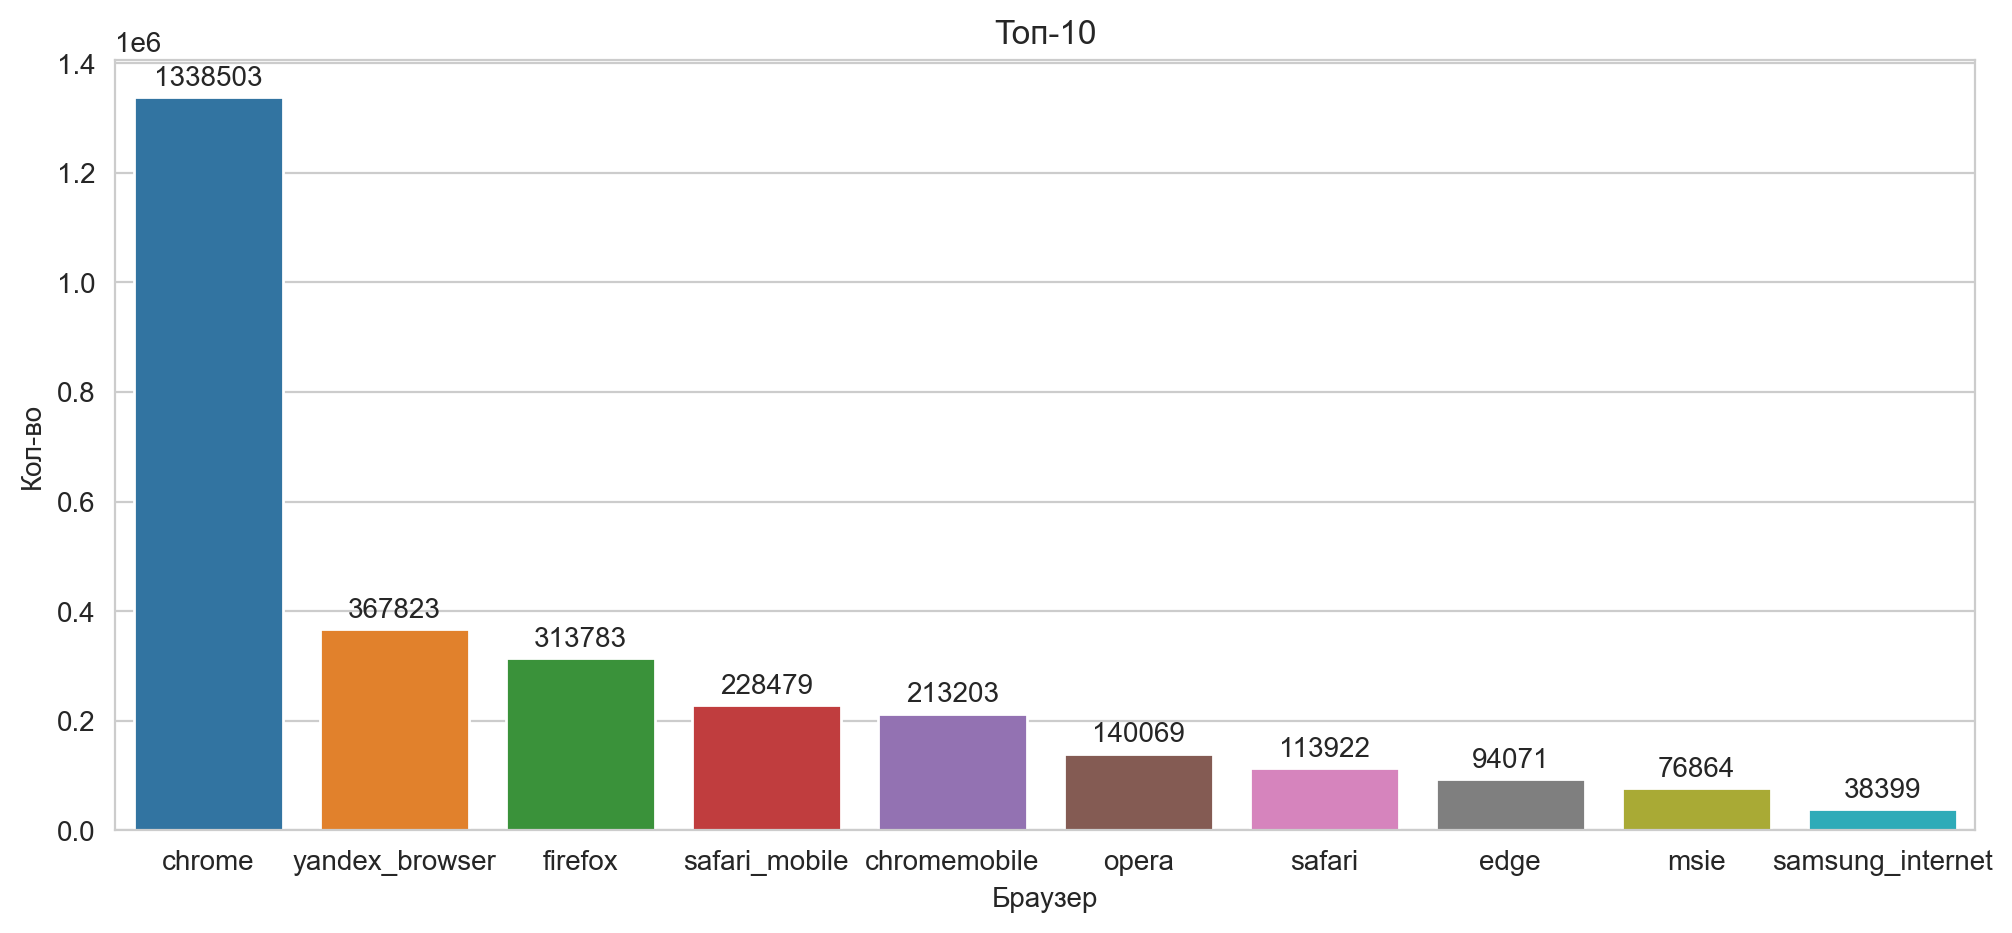

In [27]:
df3=df_browsers_hits[:10]
plt.figure(figsize=(12, 5))
plt.xlabel('Браузер')
plt.ylabel('Кол-во')
plt.title('Топ-10')
graph = sns.barplot(data=df3, x=df3['Браузер'], y=df3["Кол-во"])
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10);

In [28]:
df_browsers_hits.to_csv('df_browsers_hits.csv', index=False)

### Хиты по операционным системам.

In [29]:
df_os_hits = df1[["OSRoot","ClientID"]].groupby("OSRoot").count().sort_values(by="ClientID", ascending=False) \
            .rename(columns={"ClientID":"Кол-во"}) \
            .reset_index().rename(columns={"OSRoot":"ОС"})
df_os_hits

,ОС,Кол-во
0,windows,1985336
1,android,322858
2,ios_double,269658
3,macos,246646
4,gnu_linux,210882
5,unnown,1214
6,google_chrome_os,856
7,tizen,247
8,bsd,27
9,blackberry,9


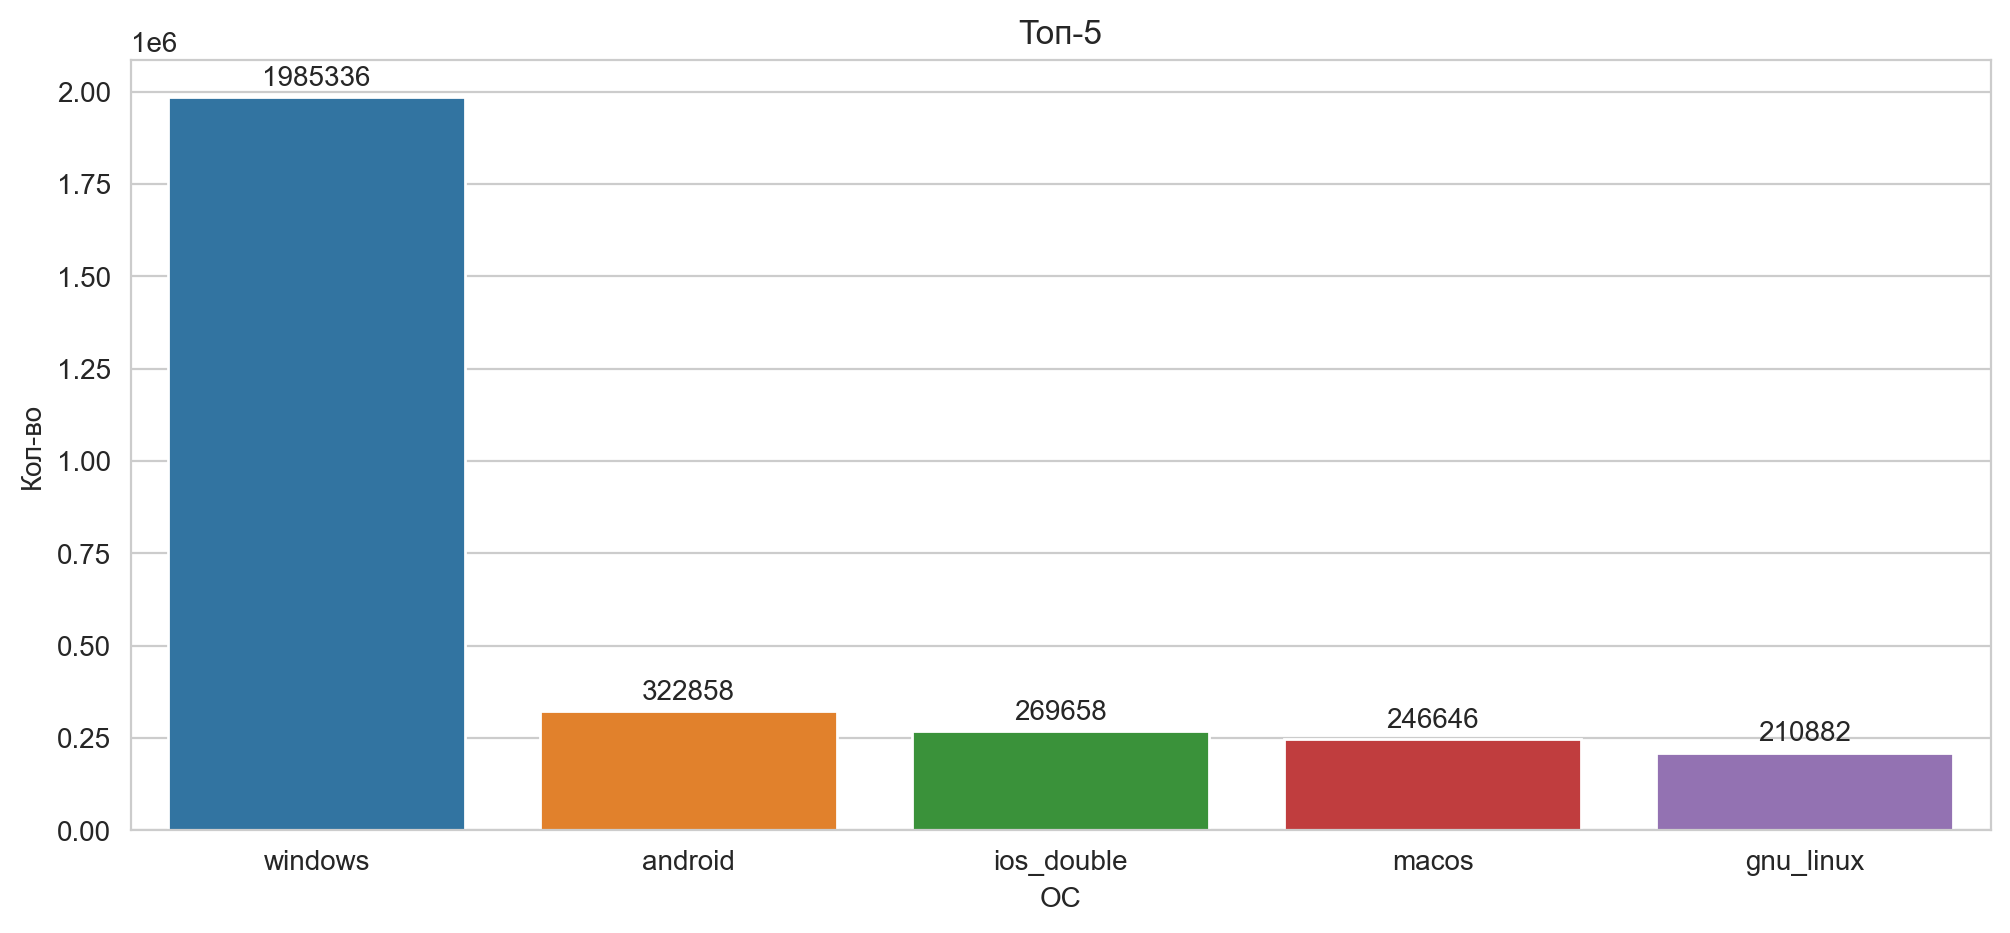

In [30]:
df4=df_os_hits[:5]
plt.figure(figsize=(12, 5))
plt.xlabel('ОС')
plt.ylabel('Кол-во')
plt.title('Топ-5')
graph = sns.barplot(data=df4, x=df4['ОС'], y=df4["Кол-во"])
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10);

In [31]:
df_os_hits.to_csv('df_os_hits.csv')

### Хиты по источникам трафика.

In [32]:
df_TraficSource_hits = df1[["TraficSource","ClientID"]].groupby("TraficSource").count().sort_values(by="ClientID", ascending=False) \
            .rename(columns={"ClientID":"Кол-во"}) \
            .reset_index().rename(columns={"TraficSource":"Канал"})
df_TraficSource_hits

,Канал,Кол-во
0,internal,1796644
1,direct,766284
2,ad,220710
3,organic,161222
4,referral,58455
5,email,28984
6,social,4396
7,recommend,598
8,saved,379
9,messenger,61


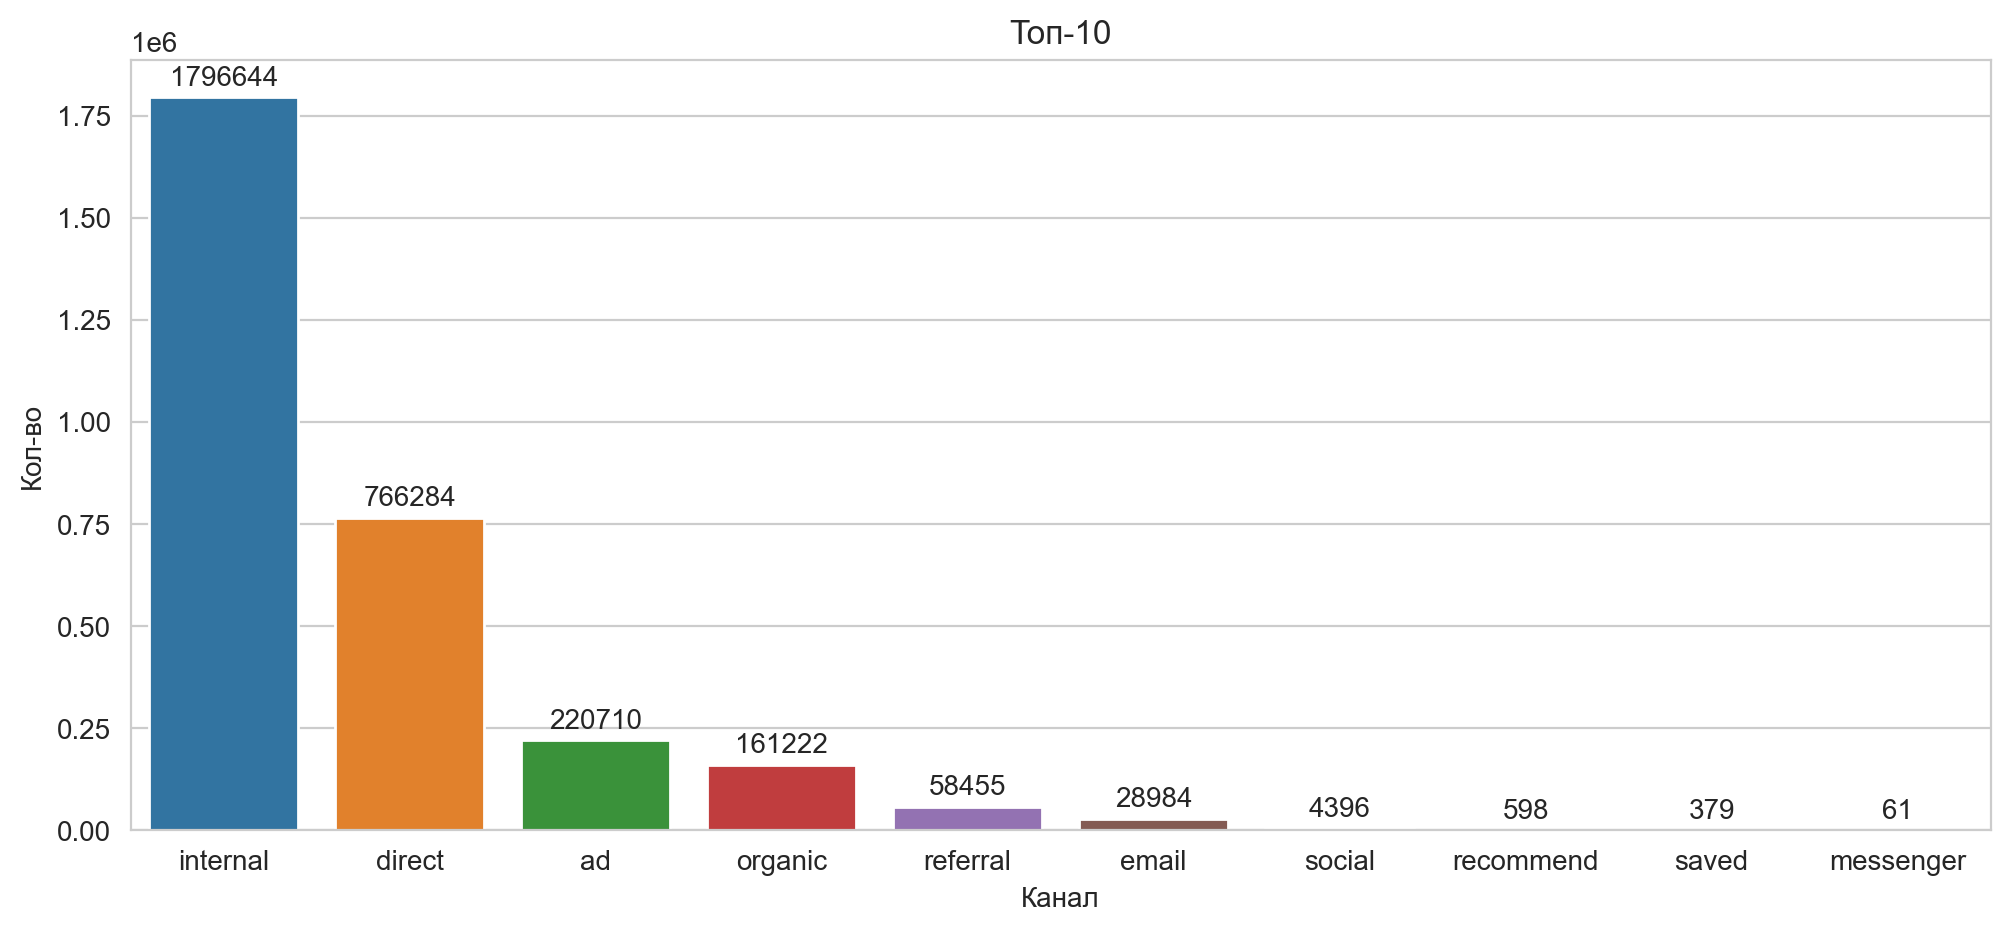

In [33]:
df5=df_TraficSource_hits[:10]
plt.figure(figsize=(12, 5))
plt.xlabel('Канал')
plt.ylabel('Кол-во')
plt.title('Топ-10')
graph = sns.barplot(data=df5, x=df5['Канал'], y=df5["Кол-во"])
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10);

In [34]:
df_TraficSource_hits.to_csv('df_TraficSource_hits.csv')

### Визиты по браузерам

In [35]:
df_browsers_visits = df2[["Browser","ClientID"]].groupby("Browser").count().sort_values(by="ClientID", ascending=False) \
            .rename(columns={"ClientID":"Кол-во"}) \
            .reset_index().rename(columns={"Browser":"Браузер"})
df_browsers_visits.head(10)

,Браузер,Кол-во
0,chrome,136356
1,chromemobile,84405
2,safari_mobile,63049
3,yandex_browser,52065
4,firefox,21508
5,opera,14825
6,samsung_internet,13718
7,yandexsearch,11646
8,android_browser,9867
9,msie,8858


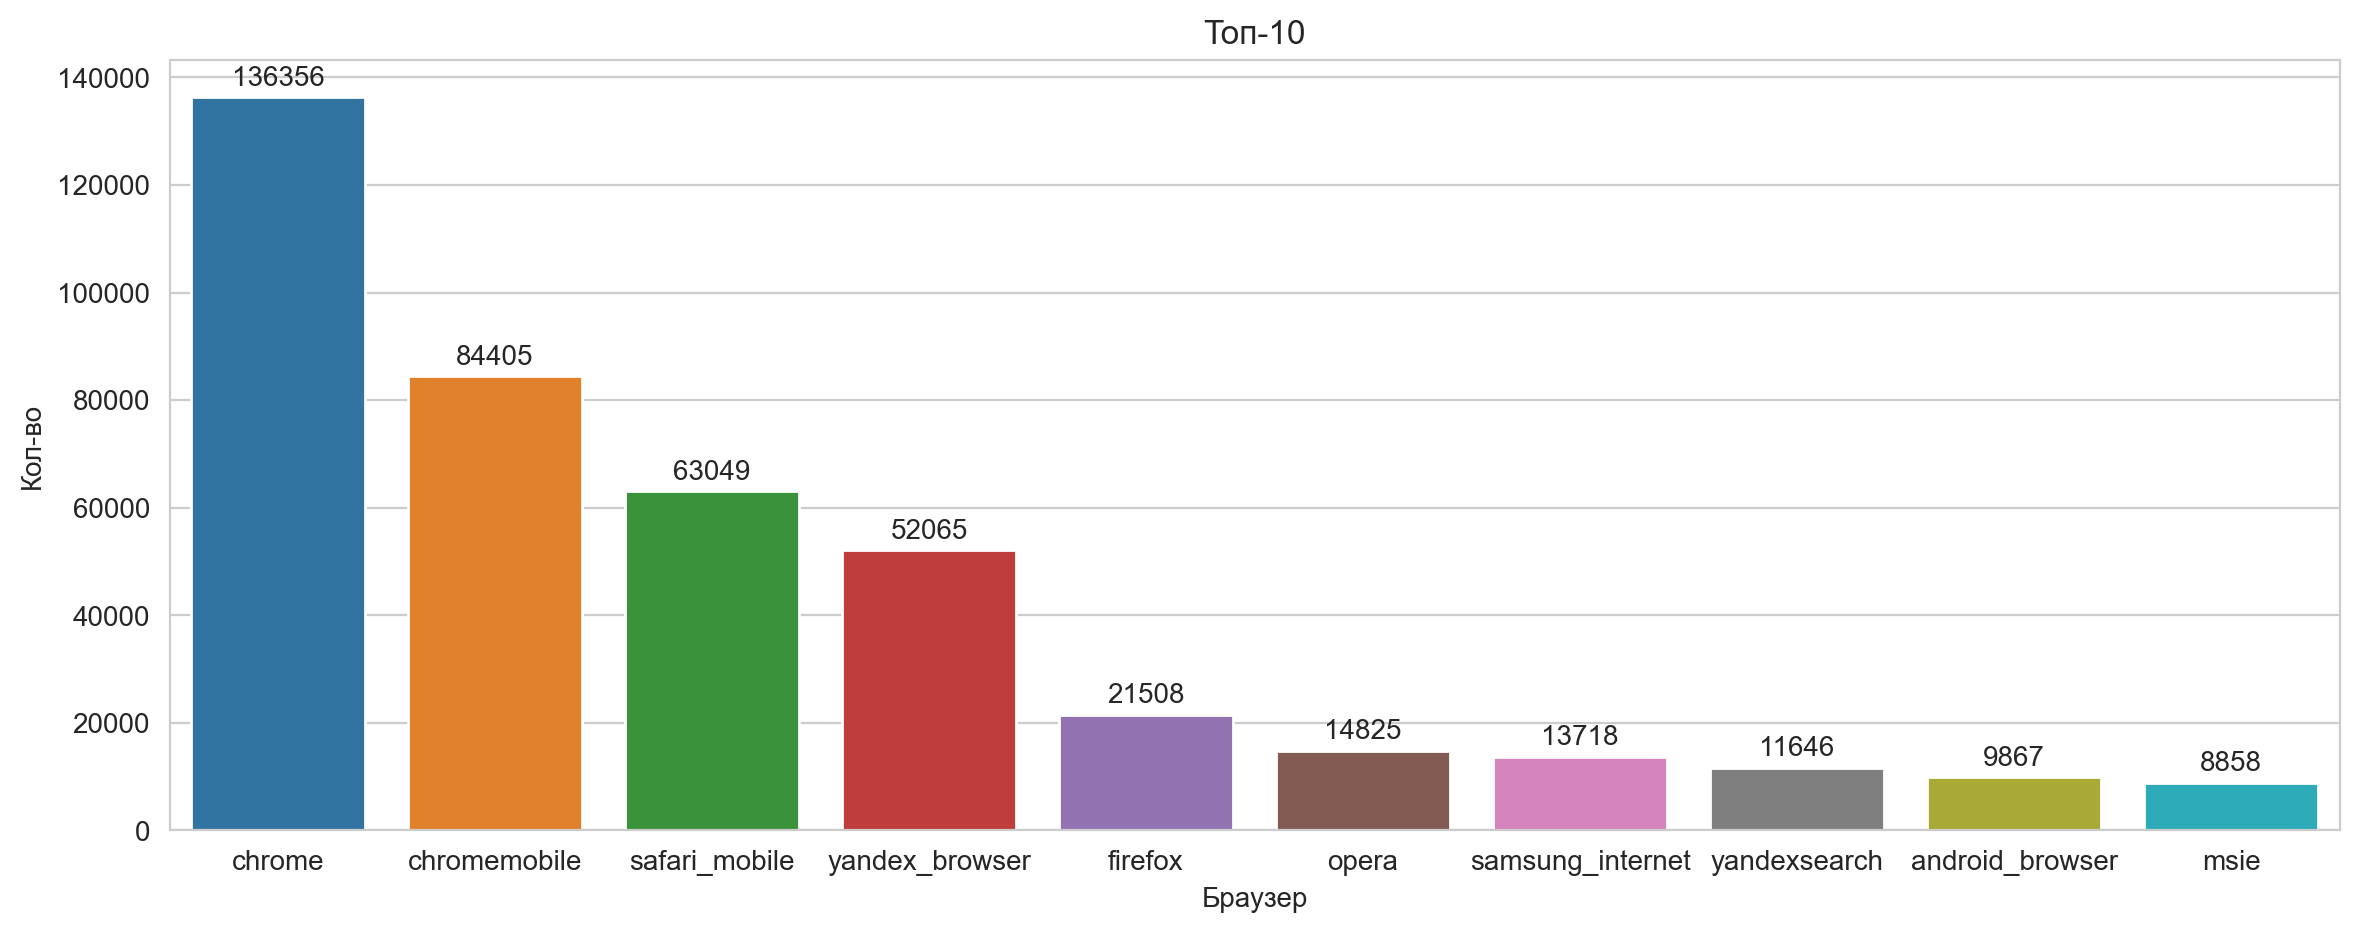

In [36]:
df6=df_browsers_visits[:10]
plt.figure(figsize=(14, 5))
plt.xlabel('Браузер')
plt.ylabel('Кол-во')
plt.title('Топ-10')
graph = sns.barplot(data=df6, x=df6['Браузер'], y=df6["Кол-во"])
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10);

In [37]:
df_browsers_visits.to_csv('df_browsers_visits.csv')

### Визиты по операционным системам.

In [38]:
df_os_visits = df2[["OSRoot","ClientID"]].groupby("OSRoot").count().sort_values(by="ClientID", ascending=False) \
            .rename(columns={"ClientID":"Кол-во"}) \
            .reset_index().rename(columns={"OSRoot":"ОС"})
df_os_visits

,ОС,Кол-во
0,windows,210419
1,android,135427
2,ios_double,74850
3,macos,21604
4,gnu_linux,8879
5,unnown,203
6,google_chrome_os,119
7,tizen,73
8,bsd,12
9,blackberry,5


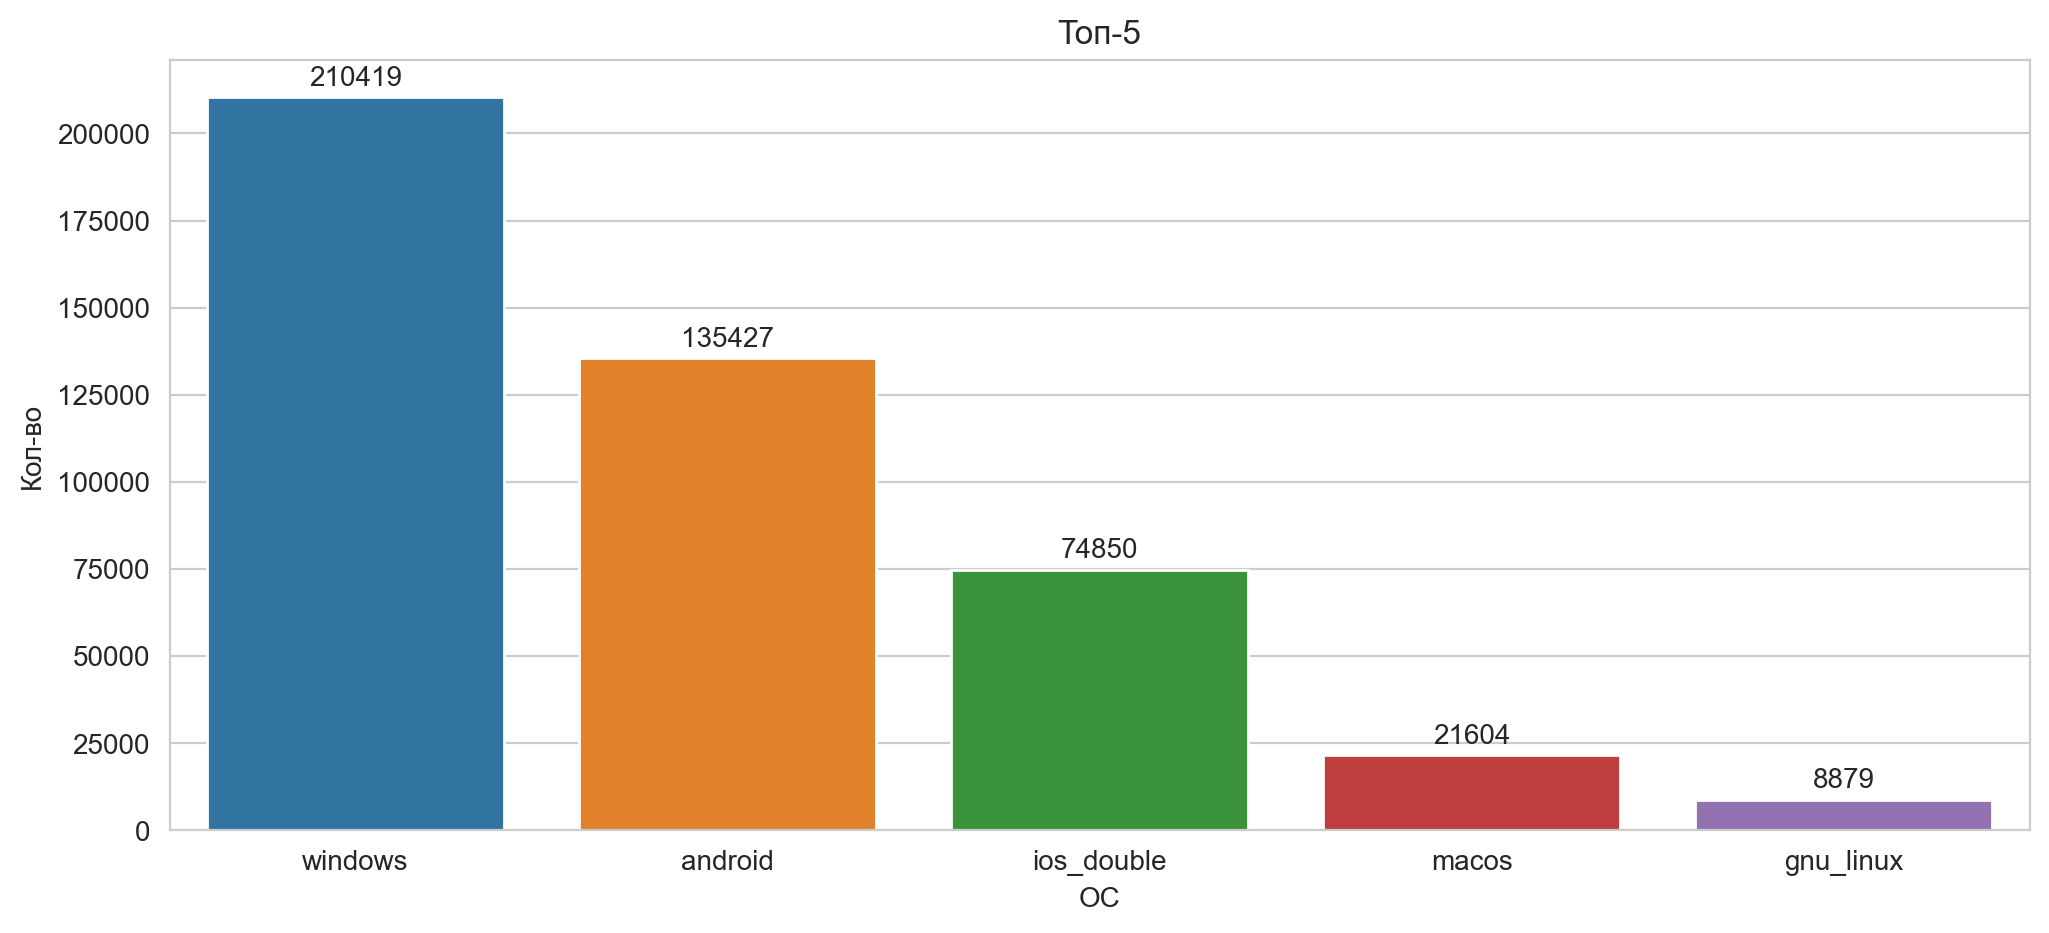

In [39]:
df7=df_os_visits[:5]
plt.figure(figsize=(12, 5))
plt.xlabel('ОС')
plt.ylabel('Кол-во')
plt.title('Топ-5')
graph = sns.barplot(data=df7, x=df7['ОС'], y=df7["Кол-во"])
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10);

In [40]:
df_os_visits.to_csv('df_os_visits.csv')

### Визиты по источникам трафика.

In [41]:
df_TraficSource_visits = df2[["TraficSource","ClientID"]].groupby("TraficSource").count().sort_values(by="ClientID", ascending=False) \
            .rename(columns={"ClientID":"Кол-во"}) \
            .reset_index().rename(columns={"TraficSource":"Канал"})
df_TraficSource_visits

,Канал,Кол-во
0,ad,127959
1,organic,125527
2,direct,101042
3,referral,50107
4,internal,30553
5,email,12699
6,social,3282
7,recommend,348
8,messenger,38
9,saved,34


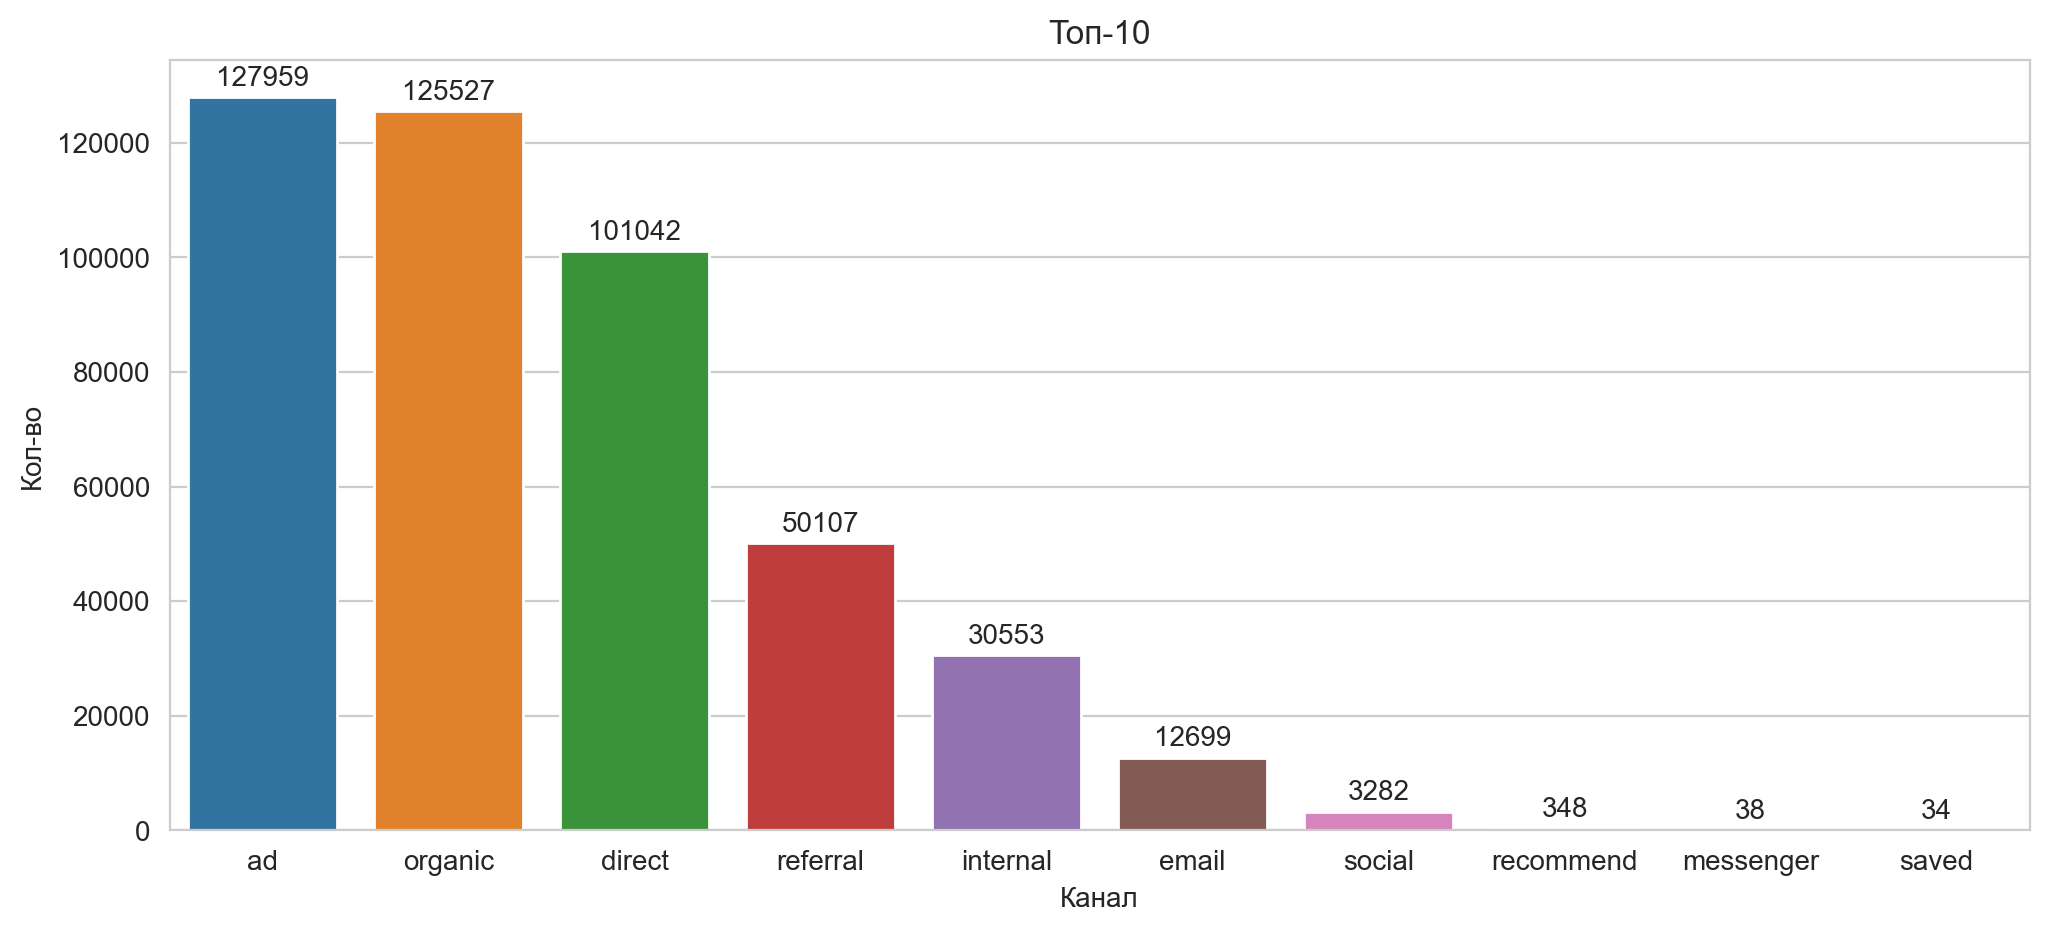

In [42]:
df8=df_TraficSource_visits[:10]
plt.figure(figsize=(12, 5))
plt.xlabel('Канал')
plt.ylabel('Кол-во')
plt.title('Топ-10')
graph = sns.barplot(data=df8, x=df8['Канал'], y=df8["Кол-во"])
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10);

In [43]:
df_TraficSource_visits.to_csv('df_TraficSource_visits.csv')

### Количество покупок и доход по источникам трафика.

In [44]:
df_TraficSource_revenue = df2[["TraficSource",'Purchases',"Revenue"]].groupby("TraficSource").sum().sort_values(by="Revenue", ascending=False) \
            .rename(columns={"Purchases":"Кол-во покупок","Revenue":'Доход'}) \
            .reset_index().rename(columns={"TraficSource":"Канал"})
df_TraficSource_revenue

,Канал,Кол-во покупок,Доход
0,direct,6283,115999845
1,internal,5456,110063865
2,ad,5871,99566609
3,organic,2819,48513140
4,email,857,13401950
5,referral,73,1278671
6,recommend,37,625327
7,social,5,92008
8,saved,1,19659
9,messenger,0,0


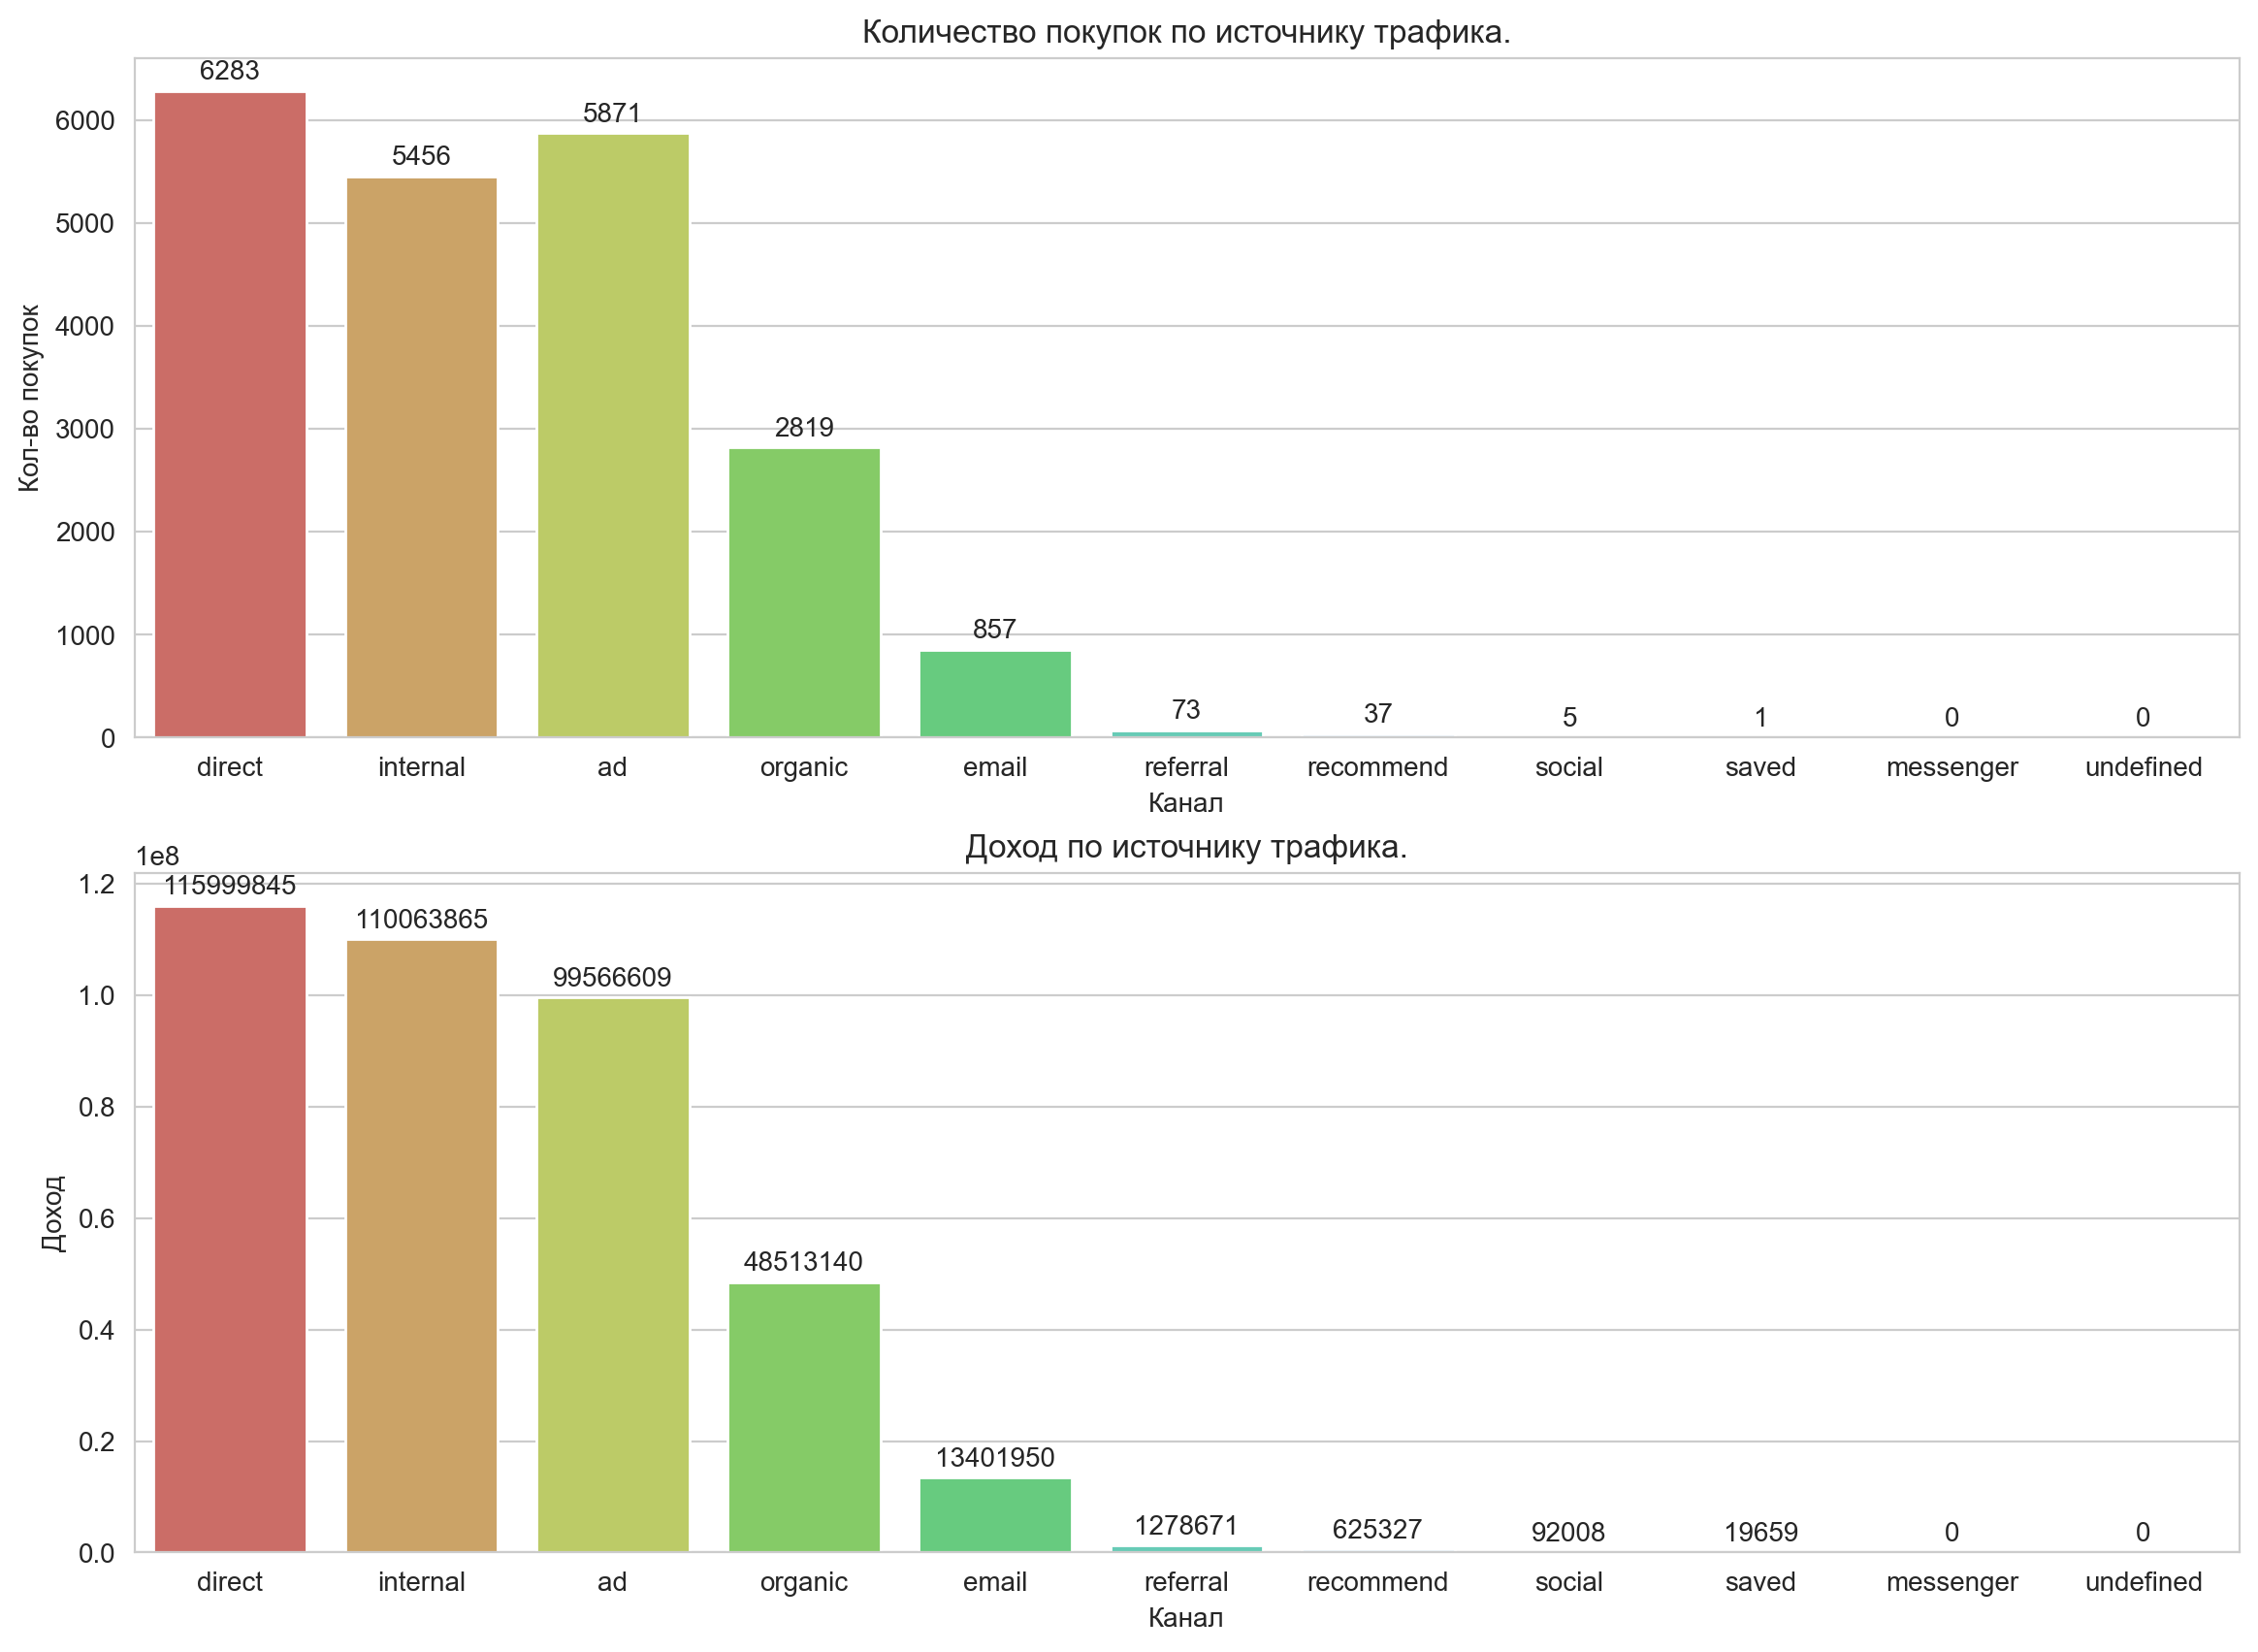

In [45]:
df10=df_TraficSource_revenue
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(14,10))
ax1 = sns.barplot(data=df10, x='Канал', y= 'Кол-во покупок', palette='hls', ax=ax1)
ax1.set(title='Количество покупок по источнику трафика.')
for c in ax1.containers:
    ax1.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10)
ax2 = sns.barplot(data=df10, x='Канал', y= 'Доход', palette='hls', ax=ax2)
ax2.set(title='Доход по источнику трафика.')
for c in ax2.containers:
    ax2.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10)
plt.show();

In [46]:
df_TraficSource_revenue.to_csv('df_TraficSource_revenue.csv', index=False)

### Вывод: Самые доходные каналы привлечения: direct, internal и ad.